In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection

print("done")

done


In [3]:
# data-preprocessing

# define column names
names = ['x', 'y', 'class']

# loading training data
df = pd.read_csv('data_knn.csv', header=None, names=names)
print(df.head())

# create feature matrix X and target vector y
X = np.array(df.iloc[:, 0:2]) 
y = np.array(df['class'])

          x         y  class
0  0.031595  0.986988    0.0
1  2.115098 -0.046244    1.0
2  0.882490 -0.075756    0.0
3 -0.055144 -0.037332    1.0
4  0.829545 -0.539321    1.0


### **Simple cross validation**

In [17]:
# split the data set into train and test
X_1, X_test, y_1, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = model_selection.train_test_split(X_1, y_1, test_size=0.3, random_state=0)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
# testing accuracy on the test-data with our optimal K-value
knn = KNeighborsClassifier(11)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 85%

CV accuracy for k = 3 is 90%

CV accuracy for k = 5 is 90%

CV accuracy for k = 7 is 90%

CV accuracy for k = 9 is 95%

CV accuracy for k = 11 is 95%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 85%

CV accuracy for k = 17 is 85%

CV accuracy for k = 19 is 76%

CV accuracy for k = 21 is 76%

CV accuracy for k = 23 is 76%

CV accuracy for k = 25 is 76%

CV accuracy for k = 27 is 76%

CV accuracy for k = 29 is 76%

****Test accuracy for k = 1 is 93%


### **10-fold cross validation**


The optimal number of neighbors is 3.


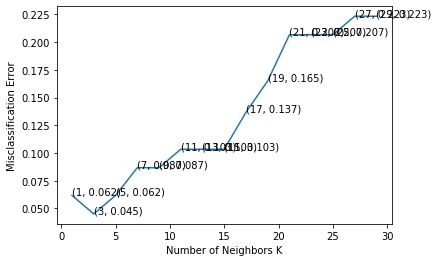

In [18]:
# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Cross-validation method
    scores = cross_val_score(knn, X_tr, y_tr, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [22]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_tr, y_tr)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 3 is 93.333333%


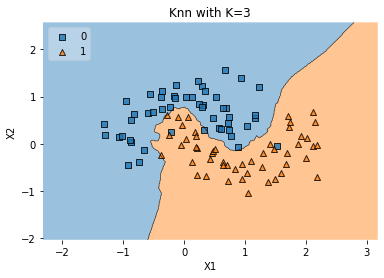

In [28]:
from mlxtend.plotting import plot_decision_regions

def knn_comparision(data, k):
    #X = data[:, :2].values
    #y = data['y'].astype(int).values
    
    X = np.array(df.iloc[:, 0:2]) 
    y = np.array(df['class']).astype(int)
    
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Plotting decision regions
    plot_decision_regions(X, y, clf=clf, legend=2)

    # Adding axes annotations
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Knn with K='+ str(k))
    plt.show()
    
knn_comparision(df, optimal_k)